# EECS 4422 Assignment 2

## Import Libraries

In [802]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import cv2
import torch
import torch.nn as nn
import os
import kornia
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
rcParams['figure.figsize'] = 11,8
plt.gray()

<Figure size 792x576 with 0 Axes>

## Functions

In [803]:
#Displays Tensors as image
def imshowTorch(input):
    # (height, width) = input.shape[2],input.shape[3]
    # image = input.numpy()
    # image = np.reshape(image, (height, width))
    image = kornia.tensor_to_image(input)
    plt.imshow(image)

In [804]:
#Converts numpy arrays to Kornia compatable tensors
def toKornia(img):
    print(img.shape)
    img = kornia.image_to_tensor(img) #Kornia in shape BCHW
    print(img.shape)
    #Adding in dummy axis from: https://sparrow.dev/adding-a-dimension-to-a-tensor-in-pytorch/
    img = torch.unsqueeze(img, dim=0)
    print(img.shape)
    return img

In [805]:
#Converts images to grayscale
def img2grayscale(img):
    img = img.astype(np.float32)/255
    img = (img[:,:,0]+ img[:,:,1]+ img[:,:,2]) / 3

    return img

In [806]:
#Q1.1
def MyCanny(img, sigma, tau):
    
    #GaussianBlur2D from https://kornia.readthedocs.io/en/latest/filters.html
    gauss = kornia.filters.GaussianBlur2d((3, 3), (sigma, sigma))

    img_blur = gauss(img)

    #Spatial Gradient2D from https://kornia.readthedocs.io/en/latest/filters.html
    #By default 1st order derivative and 'diff' derivative modality
    gradient = kornia.filters.spatial_gradient(img_blur)

    #Find magnitude and 1st order derivatives https://kornia-tutorials.readthedocs.io/en/latest/filtering_edges.html
    #   and edges-pff document given in A2 document: https://drive.google.com/file/d/0Bz1dfcnrpXM-QVpHZ1p6SUxoaXM/view?resourcekey=0-aYFhFiQTvM4x5CbfN5gllg
    grad_x = gradient[:,:,0]
    grad_y = gradient[:,:,1]
    img_grad_mag = torch.sqrt(torch.square(grad_x) + torch.square(grad_y)) #From lecture 6 (edge detection)

    fig, ax = plt.subplots(1,3, figsize=(30,30))
    ax[0].imshow(kornia.tensor_to_image((1. - grad_x.clamp(0.,1.))))
    ax[1].imshow(kornia.tensor_to_image((1. - grad_y.clamp(0.,1.))))

    #Threshold grad magnitude above given tau
    img_grad_mag = img_grad_mag / img_grad_mag.max() * 255
    img_grad_mag = img_grad_mag > tau
    ax[2].imshow(kornia.tensor_to_image(img_grad_mag))

    return 0

    

In [807]:
def findEnergy(img):

    #Spatial Gradient2D from https://kornia.readthedocs.io/en/latest/filters.html
    #By default 1st order derivative and 'diff' derivative modality
    # output = kornia.filters.sobel(img)
    # imshowTorch(output)
    
    gradient = kornia.filters.spatial_gradient(img)
    grad_x = gradient[:,:,0]
    grad_y = gradient[:,:,1]
    img_grad_mag = torch.sqrt(torch.square(grad_x) + torch.square(grad_y)) #From lecture 6 (edge detection)

    fig, ax = plt.subplots(1,3, figsize=(30,30))
    ax[0].imshow(kornia.tensor_to_image((1. - grad_x.clamp(0.,1.))))
    ax[1].imshow(kornia.tensor_to_image((1. - grad_y.clamp(0.,1.))))
    ax[2].imshow(kornia.tensor_to_image(img_grad_mag))

    return img_grad_mag

In [808]:
def findMin(M, i, j):
    result, index = 0
    #topLeft, topMiddle, topRight = 0

    if i == 0:
        result = M[i,j]
    #elif j == 0:
        
        

    return result, index

In [809]:
def findPath(M):

    (h, w) = M.shape[2:]
    result, index = 0
    seam = np.zeros_like(M)

    for i in range(0, h):
        for j in range(0, w):
            seam[i,j], min = findMin(M,i,j)
    return 0

In [810]:
def conv_func(img, kernel):
    #Get dimensions of images
    (iH, iW) = img.shape[:2]
    (kH, kW) = kernel.shape[:2]

    # for j in range(2,x-2):
    #     for k in range(2,y-2):
    #         neibour_r = img[j-2:j+3,k-2:k+3,0]
    #         sum_r = neibour_r*kernel
    #         sum_r = sum_r.sum()
    #         img[j,k,0] = sum_r
    #         neibour_g = img4[j-2:j+3,k-2:k+3,1]
    #         sum_g = neibour_g*kernel
    #         sum_g = sum_g.sum()
    #         img[j,k,1] = sum_g
    #         neibour_b = img[j-2:j+3,k-2:k+3,2]
    #         sum_b = neibour_b*kernel
    #         sum_b = sum_b.sum()
    #         img[j,k,2] = sum_b
    return 0

### Question 1

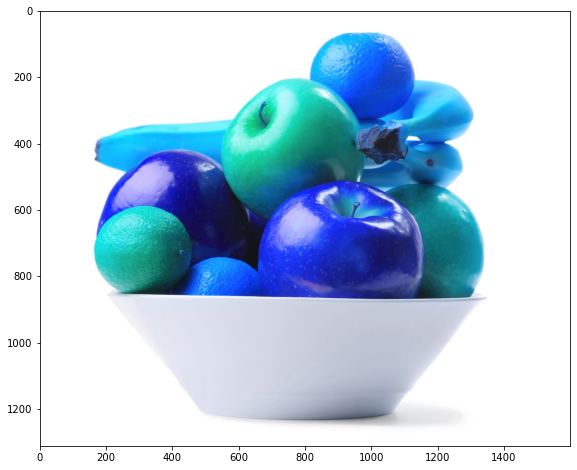

In [811]:
fruit = cv2.imread('bowl-of-fruit.jpg')
plt.imshow(fruit)

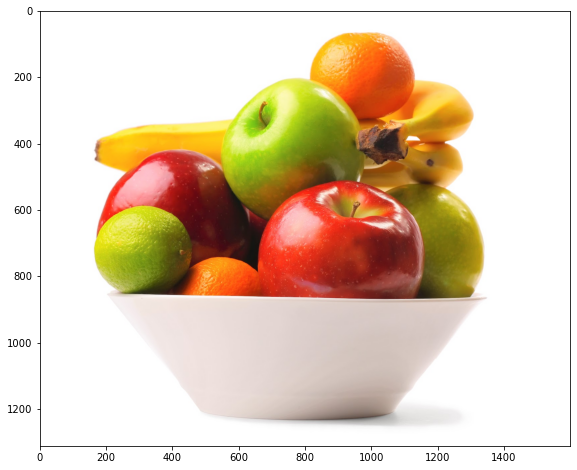

In [812]:
fruit = cv2.cvtColor(fruit, cv2.COLOR_BGR2RGB)
plt.imshow(fruit)

In [813]:
#Convert to Grayscale
#fruit_gr = fruit.astype(np.float32)/255
#fruit_gr = (fruit_gr[:,:,0]+ fruit_gr[:,:,1]+ fruit_gr[:,:,2]) / 3
#fruit_gr = cv2.cvtColor(fruit, cv2.COLOR_RGB2GRAY)
fruit_gr = img2grayscale(fruit)

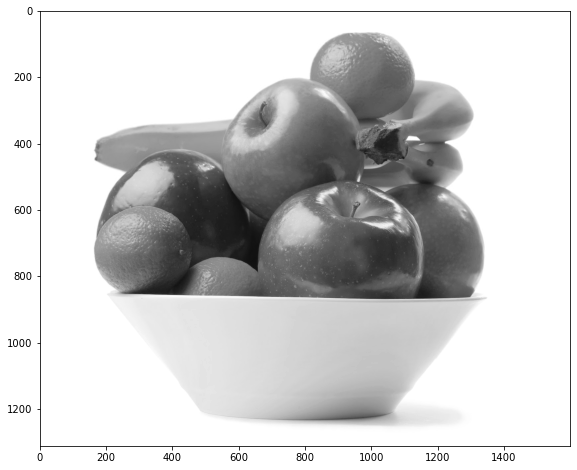

In [814]:
plt.imshow(fruit_gr)

In [815]:
#fruit_k: torch.tensor = kornia.image_to_tensor(fruit_gr)
#fruit_k = kornia.image_to_tensor(fruit_gr) #Kornia in shape BCHW

In [816]:
#fruit_k.shape

In [817]:
#Adding in dummy axis from: https://sparrow.dev/adding-a-dimension-to-a-tensor-in-pytorch/
#fruit_k = torch.unsqueeze(fruit_k, dim=0)

In [818]:
#fruit_k.shape

In [819]:
fruit_k = toKornia(fruit_gr)

(1312, 1600)
torch.Size([1, 1312, 1600])
torch.Size([1, 1, 1312, 1600])


In [820]:
type(fruit_k)

torch.Tensor

In [821]:
#foo = kornia.tensor_to_image(fruit_k)

In [822]:
#foo.shape

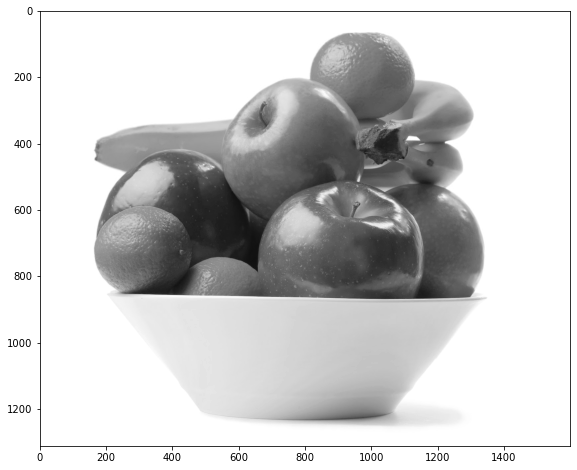

In [823]:
imshowTorch(fruit_k)

0

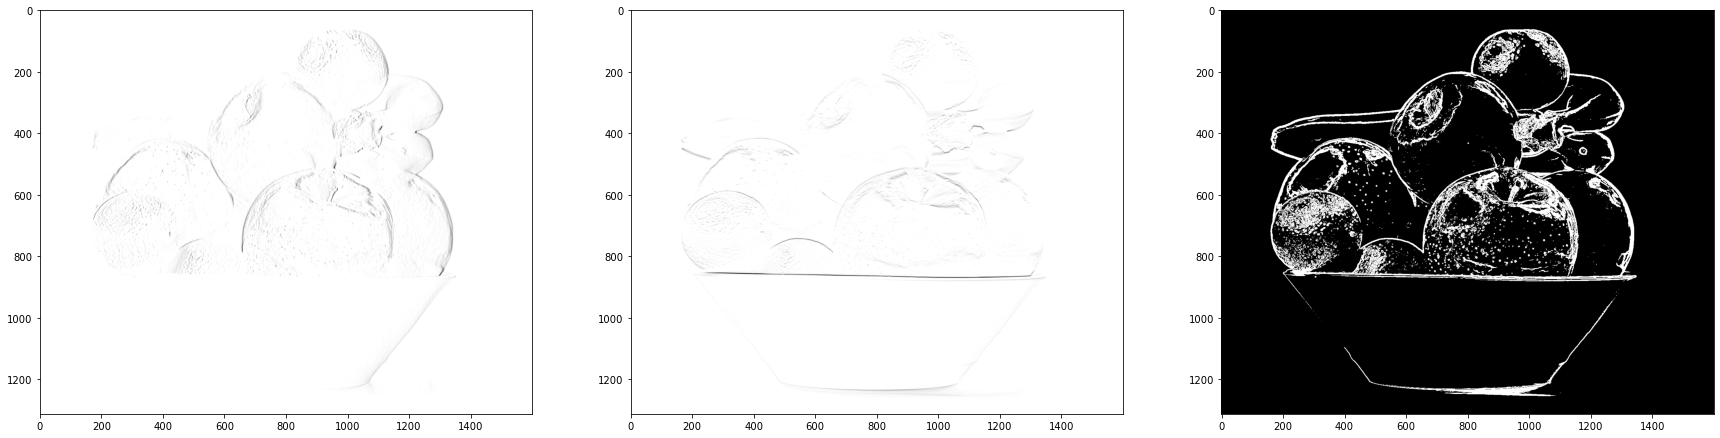

In [824]:
MyCanny(fruit_k, 1.5, 11)

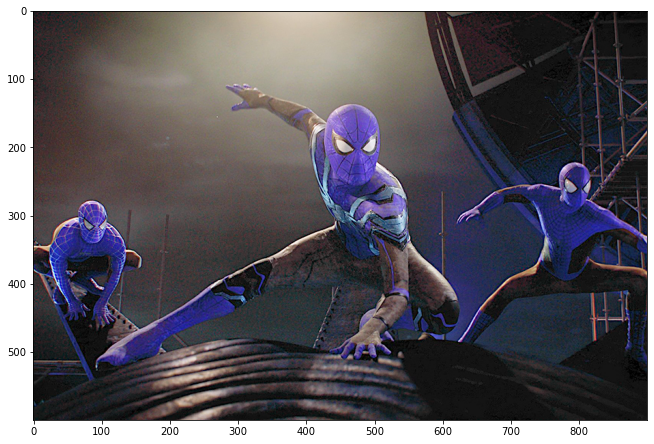

In [825]:
spidey = cv2.imread('Spider-Man-No-Way-Home-triple-threat.jpg')
plt.imshow(spidey)

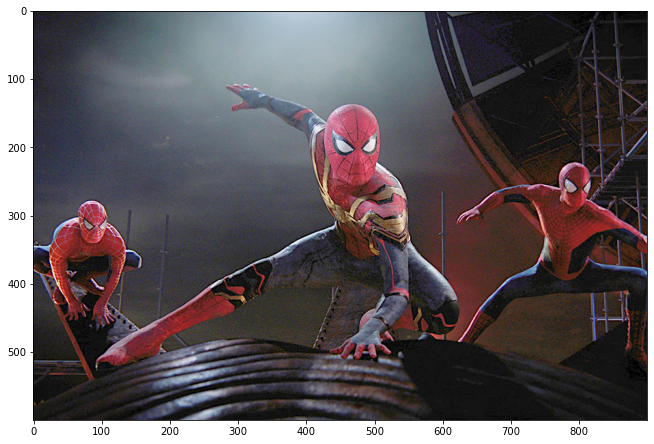

In [826]:
spidey = cv2.cvtColor(spidey, cv2.COLOR_BGR2RGB)
plt.imshow(spidey)

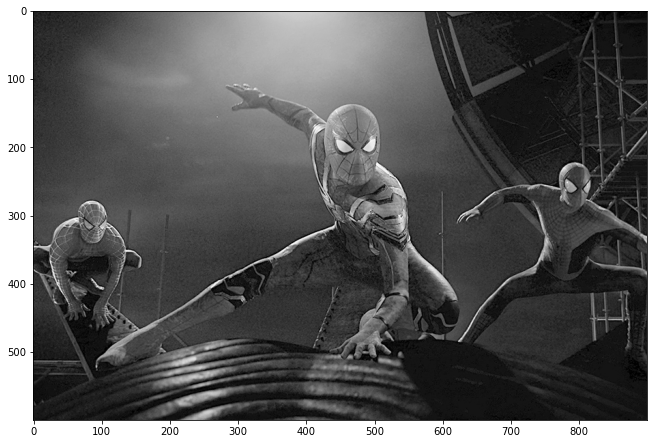

In [827]:
spidey_gr = img2grayscale(spidey)
plt.imshow(spidey_gr)

In [828]:
spidey_k = toKornia(spidey_gr)

(600, 900)
torch.Size([1, 600, 900])
torch.Size([1, 1, 600, 900])


In [829]:
type(spidey_k)

torch.Tensor

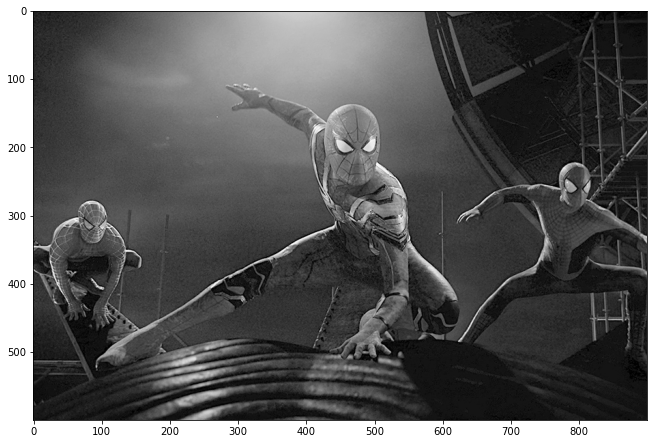

In [830]:
imshowTorch(spidey_k)

0

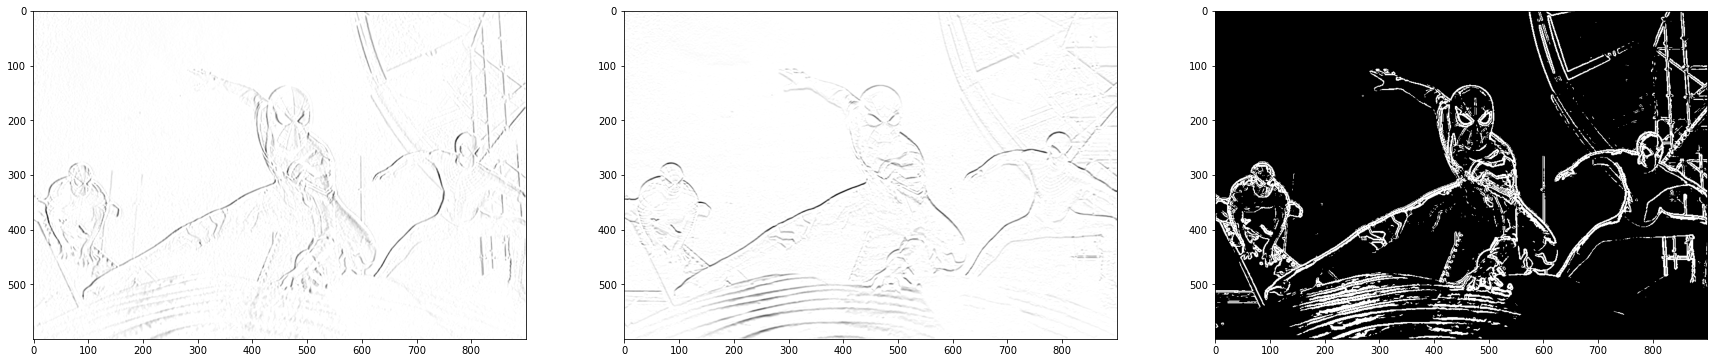

In [831]:
MyCanny(spidey_k, 1.5, 30)

### Question 2

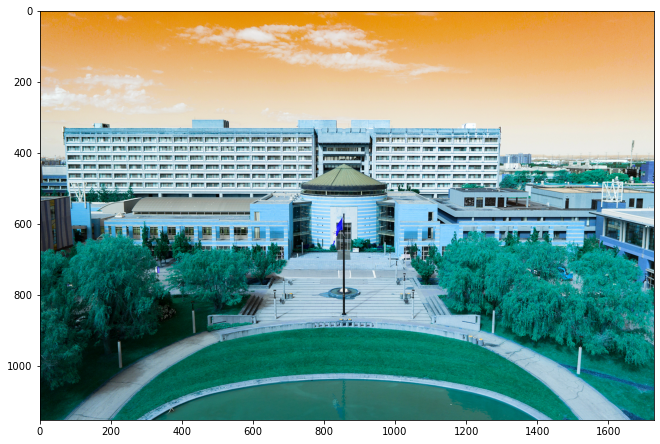

In [832]:
york = cv2.imread('York.jpg')
plt.imshow(york)

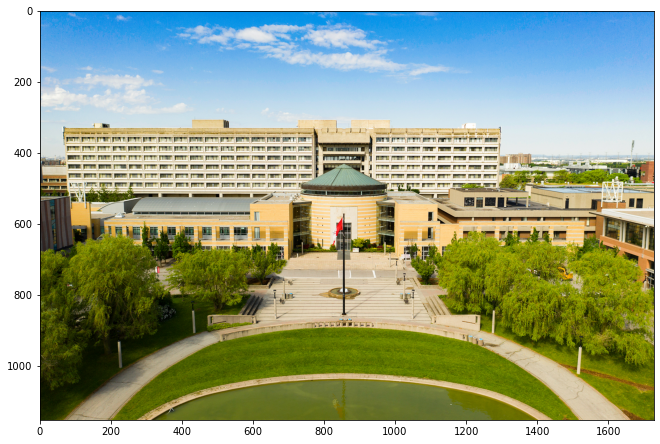

In [833]:
york = cv2.cvtColor(york, cv2.COLOR_BGR2RGB)
plt.imshow(york)

(1151, 1728, 3)
torch.Size([3, 1151, 1728])
torch.Size([1, 3, 1151, 1728])


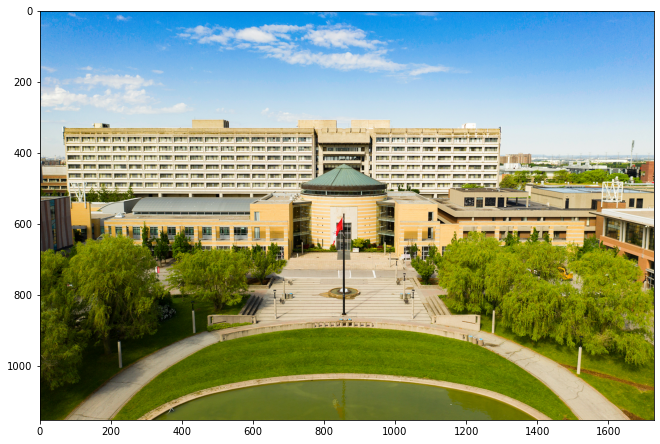

In [834]:
#york_gr = img2grayscale(york)
#plt.imshow(york_gr)
york = york.astype(np.float32)/255
#york = (york[:,:,0]+ york[:,:,1]+ york[:,:,2]) / 1
#york = (york[:,:,0]+ york[:,:,1]+ york[:,:,2]) * 3
york_k = toKornia(york)
imshowTorch(york_k)

In [835]:
kostawhy = kornia.filters.sobel(york_k)
print(kostawhy)

tensor([[[[0.0124, 0.0112, 0.0306,  ..., 0.0281, 0.0202, 0.0363],
          [0.0183, 0.0197, 0.0257,  ..., 0.0380, 0.0302, 0.0660],
          [0.0429, 0.0292, 0.0070,  ..., 0.0462, 0.0338, 0.0064],
          ...,
          [0.0091, 0.0042, 0.0065,  ..., 0.0073, 0.0070, 0.0167],
          [0.0107, 0.0084, 0.0110,  ..., 0.0029, 0.0085, 0.0051],
          [0.0124, 0.0134, 0.0134,  ..., 0.0147, 0.0094, 0.0075]],

         [[0.0058, 0.0056, 0.0124,  ..., 0.0060, 0.0104, 0.0163],
          [0.0058, 0.0029, 0.0084,  ..., 0.0018, 0.0051, 0.0051],
          [0.0070, 0.0078, 0.0040,  ..., 0.0046, 0.0060, 0.0110],
          ...,
          [0.0074, 0.0105, 0.0153,  ..., 0.0113, 0.0100, 0.0205],
          [0.0160, 0.0100, 0.0121,  ..., 0.0030, 0.0071, 0.0094],
          [0.0063, 0.0043, 0.0094,  ..., 0.0125, 0.0127, 0.0114]],

         [[0.0022, 0.0060, 0.0039,  ..., 0.0051, 0.0023, 0.0027],
          [0.0030, 0.0030, 0.0064,  ..., 0.0060, 0.0027, 0.0050],
          [0.0065, 0.0042, 0.0045,  ..., 0

In [836]:
kostawhy.shape

torch.Size([1, 3, 1151, 1728])

In [837]:
kostawhy[:,:,0,1]

tensor([[0.0112, 0.0056, 0.0060]])

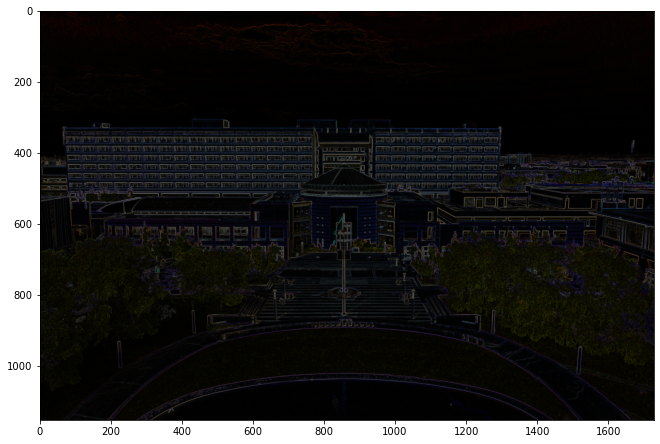

In [838]:
imshowTorch(kornia.filters.sobel(york_k))

In [839]:
placeholder = kornia.filters.sobel(york_k)

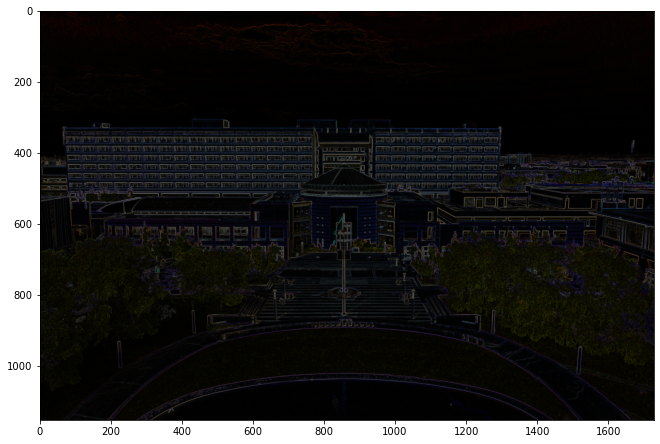

In [840]:
imshowTorch(placeholder)

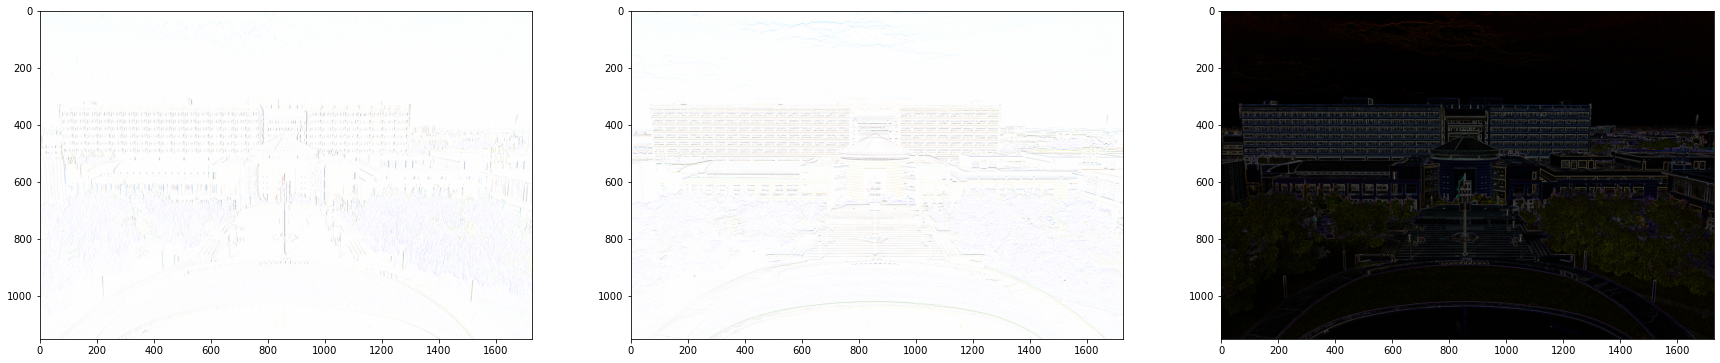

In [841]:
M = findEnergy(york_k)
#a,b,c

In [842]:
M.shape

torch.Size([1, 3, 1151, 1728])

In [843]:
m = kornia.tensor_to_image(M)

In [844]:
m.shape

(1151, 1728, 3)

In [845]:
m[0,3]

array([0.01600474, 0.00887783, 0.00876889], dtype=float32)

In [846]:
M[0,:,0,3]

tensor([0.0160, 0.0089, 0.0088])

In [847]:
m = m.sum(axis=2)
M = torch.sum(M, dim=3)

In [848]:
m[1,3]

0.025660163